<a href="https://colab.research.google.com/github/govardhan-rbg/data-science-mini-Projects/blob/main/credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  __Credit Card Fraud Detection__

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Data Cleaning__
    
* __Step 4: Exploratory Data Analysis__
    
* __Step 5: Building Model__

 __Step 1: Importing the Relevant Libraries__

In [ ]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score 

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### Step 2: Data Inspection

In [ ]:
# Load the dataset from the csv file using pandas
data = pd.read_csv(r"D:\data science\Fraud detection\creditcard.csv"  , error_bad_lines=False)

In [ ]:
data.shape

(284807, 31)

#### __Dataset consists of 284807 rows and 31 columns__

In [ ]:
# Grab a peek at the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
# Print the shape of the data
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271

In [ ]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [ ]:
print("Details of the fraudualent transactions")
fraud.Amount.describe()

Details of the fraudualent transactions


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

<AxesSubplot:xlabel='Class', ylabel='count'>

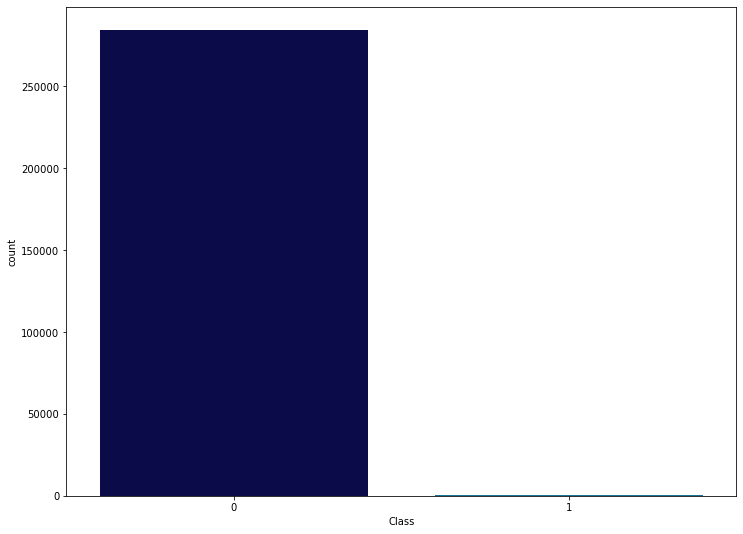

In [ ]:
plt.figure(figsize=(12,9))
sns.countplot('Class',data=data,palette='ocean')

### Step - 3 : Data Cleaning

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data =data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
# Labelencoding

le = LabelEncoder()
var_mod = data.select_dtypes(include='object').columns
for i in var_mod:
  data[i] = le.fit_transform(data[i].astype(str))

#### Step 4: Exploratory Data Analysis

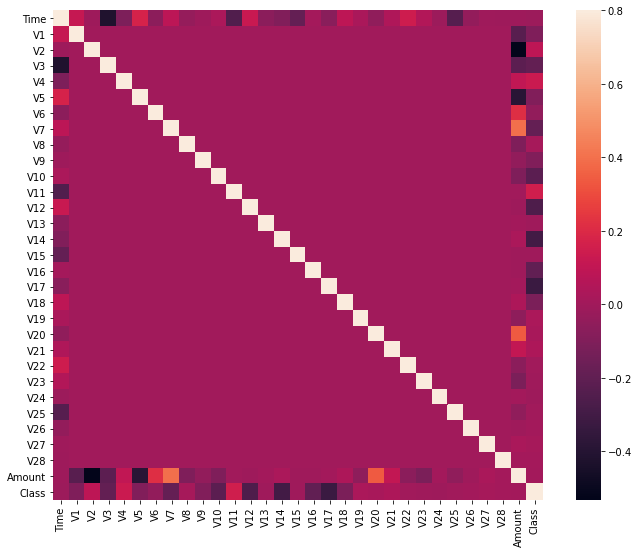

In [ ]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12 , 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
X = X.values
y = Y.values

(284807, 30)
(284807,)


In [ ]:

# Split the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y , test_size = 0.2, random_state = 42)

#### Step 5: Building Model

In [ ]:
scaler = StandardScaler()
Xtrain[: , : ] = scaler.fit_transform(Xtrain[: , : ])
Xtest[: , : ] = scaler.transform(Xtest[: , : ])

In [ ]:
algos = [ RandomForestClassifier() , LogisticRegression()  , SVC() ,  KNeighborsClassifier() , DecisionTreeClassifier() ]

names = [ 'RandomForestClassifier' , 'LogisticRegression' , 'SVC' , 'KNeighborsClassifier' ,  'DecisionTreeClassifier ' ]

rmse_list = []
acc_list = []
conf_matrix_list = []
classification_report_list = []

In [ ]:
for name in algos:
    model = name
    model.fit(Xtrain,ytrain)
    yPred = model.predict(Xtest)
    MSE= metrics.mean_squared_error(ytest,yPred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)
    acc_list.append(accuracy_score(ytest, yPred))
    
    conf_matrix_list.append(confusion_matrix(ytest, yPred))
    classification_report_list.append(classification_report(ytest,yPred))

In [ ]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list,'Accuracy' : acc_list , 'Confusion_Matric' : conf_matrix_list   })
evaluation 

,Model,RMSE,Accuracy,Confusion_Matric
0,RandomForestClassifier,0.020094,0.999596,"[[56862, 2], [21, 77]]"
1,LogisticRegression,0.029627,0.999122,"[[56855, 9], [41, 57]]"
2,SVC,0.026166,0.999315,"[[56862, 2], [37, 61]]"
3,KNeighborsClassifier,0.021772,0.999526,"[[56859, 5], [22, 76]]"
4,DecisionTreeClassifier,0.031355,0.999017,"[[56831, 33], [23, 75]]"


In [ ]:
for item,value in zip(names,classification_report_list) :
    print(item ,"\n\n" )
    print(value, "\n\n")

RandomForestClassifier 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962
 


LogisticRegression 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962
 


SVC 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.62      0.76        98

    accuracy                           1.00     56962
   macro avg       0.98      0.81      0.88     56962
weighted avg 

CONFUSION MATRIX of the algorithms



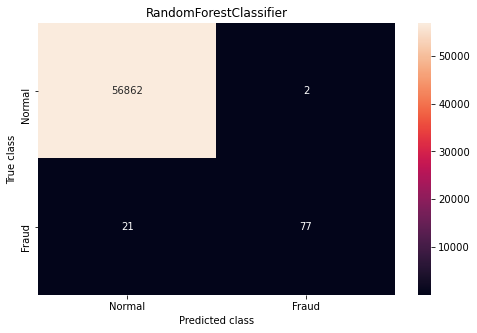

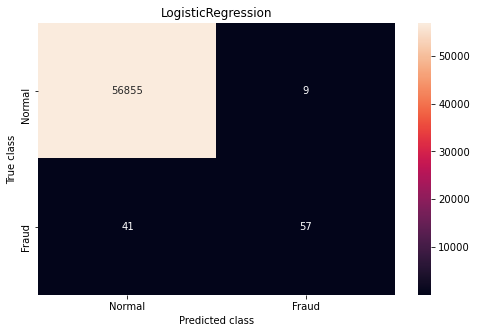

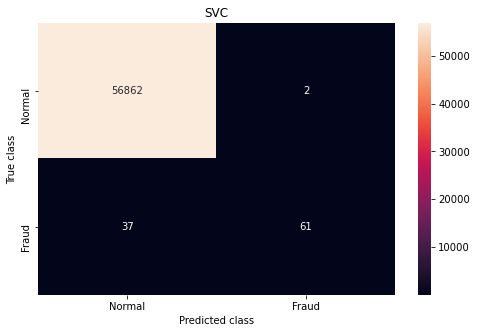

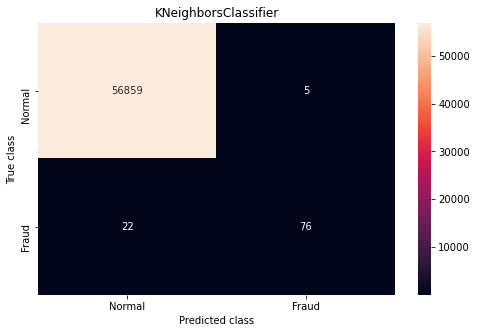

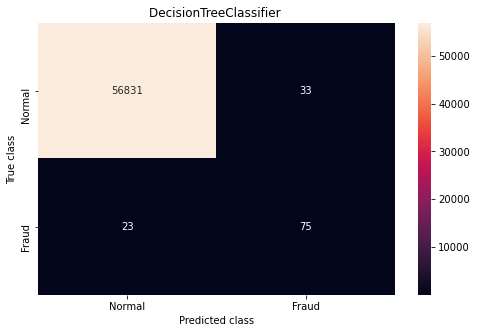

In [ ]:
# plotting the confusion matrix
LABELS = ['Normal', 'Fraud']
print("CONFUSION MATRIX of the algorithms\n")
for name , x in zip(names , conf_matrix_list):
    plt.figure(figsize =(8 , 5))
    sns.heatmap(x, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
    plt.title(name)
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

### From the results we can say that Random Forest has worked at the best from remaining algorithms